In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
#data = pd.read_csv("drive/MyDrive/MCDO/Semestre1/Modelos_estocasticos/Proyecto/Defunciones_Saltillo2022-2023.csv")
data = pd.read_csv("Defunciones_Saltillo2022-2023.csv")
print(data.shape)

(11147, 75)


C:\Users\Rey\AppData\Local\Temp\ipykernel_32932\844684141.py:2: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Defunciones_Saltillo2022-2023.csv")


In [106]:
#Limpieza de datos NaN
data = data.dropna(axis=1)
data = data.dropna()
print(data.shape)
print(data.columns)

(11147, 70)
Index(['ent_regis', 'mun_regis', 'tloc_regis', 'loc_regis', 'ent_resid',
       'mun_resid', 'tloc_resid', 'loc_resid', 'ent_ocurr', 'mun_ocurr',
       'tloc_ocurr', 'loc_ocurr', 'causa_def', 'lista_mex', 'sexo', 'ent_nac',
       'afromex', 'conindig', 'lengua', 'cve_lengua', 'nacionalid',
       'nacesp_cve', 'edad', 'sem_gest', 'gramos', 'dia_ocurr', 'mes_ocurr',
       'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim',
       'mes_nacim', 'anio_nacim', 'cond_act', 'ocupacion', 'escolarida',
       'edo_civil', 'tipo_defun', 'ocurr_trab', 'lugar_ocur', 'par_agre',
       'asist_medi', 'cirugia', 'natviole', 'necropsia', 'usonecrops',
       'encefalica', 'donador', 'sitio_ocur', 'cond_cert', 'derechohab',
       'embarazo', 'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo',
       'gr_lismex', 'area_ur', 'edad_agru', 'complicaro', 'dia_cert',
       'mes_cert', 'anio_cert', 'ent_ocules', 'mun_ocules', 'loc_ocules',
       'razon_m', 'dis_re_oax'],
     

In [90]:
print(data['anio_ocur'].value_counts())

anio_ocur
2022    5802
2023    5200
2021      64
2016       9
2020       8
2019       6
2013       5
2010       5
2012       5
2011       4
2015       4
1995       4
1997       3
2007       3
2000       2
2009       2
2008       2
2002       2
2005       2
2014       2
1999       2
9999       2
1998       1
2018       1
2006       1
1994       1
1963       1
1993       1
2004       1
2017       1
2001       1
Name: count, dtype: int64


In [107]:
#Filtra los años 2022 y 2023
muertes_saltillo = data
oy = muertes_saltillo['anio_ocur'][muertes_saltillo['anio_ocur'] != 2023]
muertes_saltillo23 = muertes_saltillo.drop(oy.index).reset_index()
muertes_saltillo23 = muertes_saltillo23.drop(columns='index', axis = 1)
oy = muertes_saltillo['anio_ocur'][muertes_saltillo['anio_ocur'] != 2022]
muertes_saltillo22 = muertes_saltillo.drop(oy.index).reset_index()
muertes_saltillo22 = muertes_saltillo22.drop(columns='index', axis = 1)
muertes_saltillo = pd.concat([muertes_saltillo22, muertes_saltillo23])
#print(muertes_saltillo)

In [108]:
#Seleccion de variables
Var_selec = ['anio_ocur', 'tipo_defun', 'sexo', 'edad_agru', 'edo_civil', 'ocupacion', 'escolarida', 'lugar_ocur']
muertes_saltillo_var = muertes_saltillo[Var_selec]
#muertes_saltillo_var = muertes_saltillo_var.astype('category')
print(muertes_saltillo_var.shape)

(11002, 8)


In [109]:
print(muertes_saltillo_var['anio_ocur'].value_counts())

anio_ocur
2022    5802
2023    5200
Name: count, dtype: int64


In [111]:
#Tipos de defunciones
print(muertes_saltillo_var['tipo_defun'].value_counts())

tipo_defun
4    10343
1      415
3      171
2       60
9       13
Name: count, dtype: int64


<ipython-input-138-682310aeb786>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas, fontsize=10)


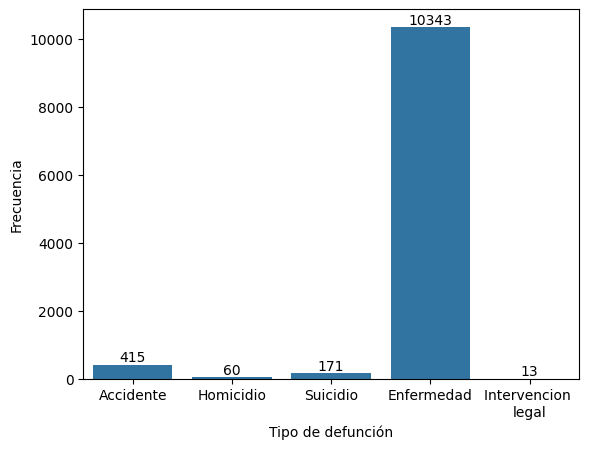

In [138]:
# Gráfico de distribución de tipos de defuncion
sns.countplot(data=muertes_saltillo_var, x='tipo_defun')

# Cambiar el nombre de los ejes
plt.xlabel('Tipo de defunción', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)

# Cambiar las etiquetas del eje x
nuevas_etiquetas = ['Accidente', 'Homicidio', 'Suicidio', 'Enfermedad', 'Intervencion \nlegal']

# Añadir los contadores en cada barra
ax = plt.gca()  # Obtener el eje actual
ax.set_xticklabels(nuevas_etiquetas, fontsize=10)

for p in ax.patches:
    height = p.get_height()  # Obtener la altura de la barra
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Posición del contador
            str(int(height)),  # El valor que se mostrará
            ha='center',  # Alineación horizontal
            va='bottom',  # Alineación vertical
            fontsize=10)  # Tamaño de la fuente

# Mostrar el gráfico
plt.show()

In [95]:
# Filtrar las filas
data_filtrado = muertes_saltillo_var[muertes_saltillo_var['tipo_defun'] == 9].drop(columns='tipo_defun', axis = 1)
datos = muertes_saltillo_var.drop(data_filtrado.index)
print(datos['tipo_defun'].value_counts())
print(datos.shape)

tipo_defun
4    10330
1      415
3      171
2       60
Name: count, dtype: int64
(10976, 8)


In [96]:
# Correlación lineal entre variables
corr_matrix = datos.corr(method='pearson')
#print(corr_matrix)
counter = 0
for i in range(datos.shape[1]):
  for j in range(i):
    if ((corr_matrix.iloc[i,j] > 0.5)|((corr_matrix.iloc[i,j] < -0.5))):
      counter += 1
      print(f'({i},{j}) Correlacion: {corr_matrix.iloc[i,j]}')
#print(corr_matrix.iloc[0,1])
print(counter)

(7,1) Correlacion: 0.9283724587591952
1


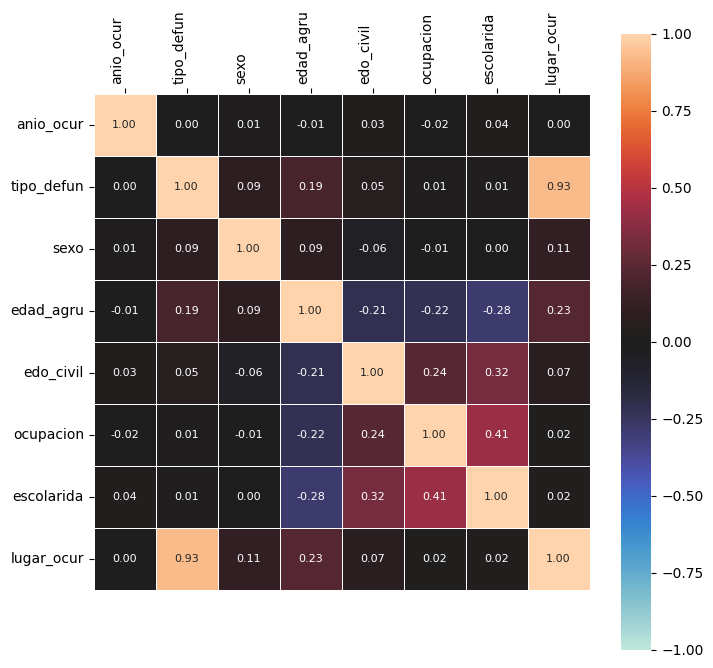

In [139]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot     = True,
    linewidth=.5,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    square    = True,
    ax        = ax,
    fmt=".2f"
)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

In [99]:
# División de los datos
#Variables independientes
X = datos.drop(columns='tipo_defun', axis = 1)
#Variable dependiente
y = datos['tipo_defun']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(10976, 7) (8780, 7) (2196, 7)


In [102]:
# Crear un clasificador Naive Bayes (GaussianNB para datos continuos)
modelo = CategoricalNB()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

CategoricalNB()

In [103]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

In [104]:
# Evaluar el modelo: calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision * 100:.2f}%')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión:")
#print(conf_matrix)

Precisión del modelo: 96.77%


In [105]:
print(modelo.predict(data_filtrado))

[1 1 1 1 1 1 1 1 4 1 1 1 1]
